<a href="https://colab.research.google.com/github/Raghayev17889/tda_project/blob/main/TDA_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trials:
I have tried numbers like 0 vs 8 and 8 vs 6 and 1 vs 8

*   0 vs 8  -- I mean not bad nearly near to raw data
*   8 vs 6  -- very bad in simpler one(first, but normal(~89) in others) worse than raw data
*   1 vs 8 -- nearly perfect(even got 1.0 in one) I hope it is not overfitting :) and better than raw data

In [ ]:
!pip install ripser
!pip install persim
!pip install gudhi

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=0511d3e20378f93c2ea339e6ddbc610f2540a4643ce7f8540a7df8a94c87e76e
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.8 MB/s eta 0:00:00


In [ ]:
#eger rakamlari deyismek isterseniz burada maskda  degismek yeterli
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

# Filter the wanted data
mask = (y == 1) | (y == 8)
X = X[mask]
y = y[mask]

#reducing the samples because it took too much time
X_training = X[:3000, :]
y_training = y[:3000]
X_training = X_training / 255.0
X_imgs = X_training.reshape(-1, 28, 28)

In [ ]:
def image_to_pointcloud(img, threshold=0.5):
    points = np.argwhere(img > threshold)
    return points

pointclouds = [image_to_pointcloud(img) for img in X_imgs]


In [ ]:
from ripser import ripser
from persim import PersistenceImager

diagrams = [ripser(pc, maxdim=1)['dgms'] for pc in pointclouds]


In [ ]:
def extract_tda_features(diag):
    H1 = diag[1]
    if len(H1) == 0:
        return [0, 0]  # no loops
    lifetimes = H1[:,1] - H1[:,0]
    lifetimes = np.sort(lifetimes)
    n_of_loops = len(H1)
    longest_loop = 0
    second_longest = 0
    if(n_of_loops > 0):
      longest_loop = lifetimes[-1]
    if(n_of_loops > 1):
      second_longest = lifetimes[-2]
    return [
        n_of_loops,
        longest_loop
    ]

tda_features = np.array([extract_tda_features(dgm) for dgm in diagrams])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tda_features, y_training, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
X_unseen = X[3000:5000]
y_unseen = y[3000:5000]

X_unseen_imgs = X_unseen.reshape(-1, 28, 28)
pointclouds_unseen = [image_to_pointcloud(img) for img in X_unseen_imgs]
diagrams_unseen = [ripser(pc, maxdim=1)['dgms'] for pc in pointclouds_unseen]
tda_features_unseen = np.array([extract_tda_features(dgm) for dgm in diagrams_unseen])

# Predict and evaluate
y_pred_unseen = clf.predict(tda_features_unseen)
print("Unseen Accuracy:", accuracy_score(y_unseen, y_pred_unseen))
print("the number of iterations:", clf.n_iter_)


Accuracy: 0.9883333333333333
Unseen Accuracy: 0.9945
the number of iterations: [30]


In [ ]:
#lets add a new feature
def extract_tda_features(diag):
    H1 = diag[1]
    if len(H1) == 0:
        return [0, 0]  # no loops
    lifetimes = H1[:,1] - H1[:,0]
    lifetimes = np.sort(lifetimes)
    n_of_loops = len(H1)
    longest_loop = 0
    second_longest = 0
    if(n_of_loops > 0):
      longest_loop = lifetimes[-1]
    if(n_of_loops > 1):
      second_longest = lifetimes[-2]
    return [
        n_of_loops,
        longest_loop,
        second_longest
    ]

tda_features = np.array([extract_tda_features(dgm) for dgm in diagrams])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tda_features, y_training, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
X_unseen = X[3000:5000]
y_unseen = y[3000:5000]

X_unseen_imgs = X_unseen.reshape(-1, 28, 28)
pointclouds_unseen = [image_to_pointcloud(img) for img in X_unseen_imgs]
diagrams_unseen = [ripser(pc, maxdim=1)['dgms'] for pc in pointclouds_unseen]
tda_features_unseen = np.array([extract_tda_features(dgm) for dgm in diagrams_unseen])

# Predict and evaluate
y_pred_unseen = clf.predict(tda_features_unseen)
print("Unseen Accuracy:", accuracy_score(y_unseen, y_pred_unseen))
print("the number of iterations:", clf.n_iter_)


Accuracy: 0.9866666666666667
Unseen Accuracy: 0.996
the number of iterations: [40]


In [ ]:
#lets add a new feature
def extract_tda_features(diag):
    H1 = diag[1]
    if len(H1) == 0:
        return [0, 0]  # no loops
    lifetimes = np.stack((H1[:,1] - H1[:,0], H1[:,1]), axis=1)
    lifetimes = lifetimes[np.argsort(lifetimes[:, 0])]
    n_of_loops = len(H1)
    longest_loop = 0
    second_longest = 0
    death_of_longest = 0
    if(n_of_loops > 0):
      longest_loop = lifetimes[-1][0]
      death_of_longest = lifetimes[-1][1]
    if(n_of_loops > 1):
      second_longest = lifetimes[-2][0]
    return [
        n_of_loops,
        longest_loop,
        second_longest,
        death_of_longest
    ]

tda_features = np.array([extract_tda_features(dgm) for dgm in diagrams])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tda_features, y_training, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
X_unseen = X[3000:5000]
y_unseen = y[3000:5000]

X_unseen_imgs = X_unseen.reshape(-1, 28, 28)
pointclouds_unseen = [image_to_pointcloud(img) for img in X_unseen_imgs]
diagrams_unseen = [ripser(pc, maxdim=1)['dgms'] for pc in pointclouds_unseen]
tda_features_unseen = np.array([extract_tda_features(dgm) for dgm in diagrams_unseen])

# Predict and evaluate
y_pred_unseen = clf.predict(tda_features_unseen)
print("Unseen Accuracy:", accuracy_score(y_unseen, y_pred_unseen))
print("the number of iterations:", clf.n_iter_)


Accuracy: 0.99
Unseen Accuracy: 0.994
the number of iterations: [50]


In [ ]:
# Let's add a new feature
def extract_tda_features(diag):
    H1 = diag[1]
    if len(H1) == 0:
        return [0, 0, 0, 0, 0, 0, 0]
    lifetimes = np.stack((H1[:, 1] - H1[:, 0], H1[:, 0], H1[:, 1]), axis=1)
    lifetimes = lifetimes[np.argsort(lifetimes[:, 0])]

    n_of_loops = len(H1)
    longest_loop = 0
    second_longest = 0
    death_of_longest = 0
    death_of_second = 0
    birth_of_longest = 0
    birth_of_second = 0

    if n_of_loops > 0:
        longest_loop = lifetimes[-1][0]
        birth_of_longest = lifetimes[-1][1]
        death_of_longest = lifetimes[-1][2]

    if n_of_loops > 1:
        second_longest = lifetimes[-2][0]
        birth_of_second = lifetimes[-2][1]
        death_of_second = lifetimes[-2][2]

    return [
        n_of_loops,
        longest_loop,
        second_longest,
        birth_of_longest,
        birth_of_second,
        death_of_longest,
        death_of_second
    ]

tda_features = np.array([extract_tda_features(dgm) for dgm in diagrams])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tda_features, y_training, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
X_unseen = X[3000:5000]
y_unseen = y[3000:5000]

X_unseen_imgs = X_unseen.reshape(-1, 28, 28)
pointclouds_unseen = [image_to_pointcloud(img) for img in X_unseen_imgs]
diagrams_unseen = [ripser(pc, maxdim=1)['dgms'] for pc in pointclouds_unseen]
tda_features_unseen = np.array([extract_tda_features(dgm) for dgm in diagrams_unseen])

# Predict and evaluate
y_pred_unseen = clf.predict(tda_features_unseen)
print("Unseen Accuracy:", accuracy_score(y_unseen, y_pred_unseen))
print("the number of iterations:", clf.n_iter_)


Accuracy: 0.9916666666666667
Unseen Accuracy: 0.995
the number of iterations: [75]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_raw = X[:3000]
y_train_raw = y[:3000]

clf2 = LogisticRegression(max_iter=1000)
clf2.fit(X_train_raw, y_train_raw)

X_unseen_raw = X[3000:5000]
y_unseen_raw = y[3000:5000]

y_pred_raw_unseen = clf2.predict(X_unseen_raw)
print("Raw data accuracy:", accuracy_score(y_unseen_raw, y_pred_raw_unseen))
print("the number of iterations:", clf2.n_iter_)


Raw data accuracy: 0.9755
the number of iterations: [66]


Now the results are like this:


*   I have no overfitting
*   1 and 8 classification is better with TDA for accuracy on unseen data

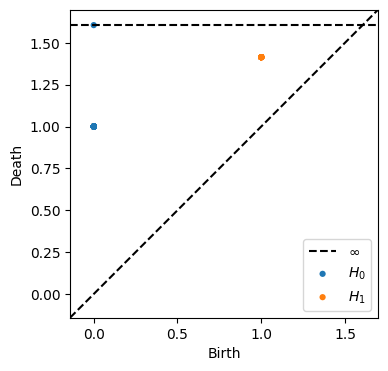

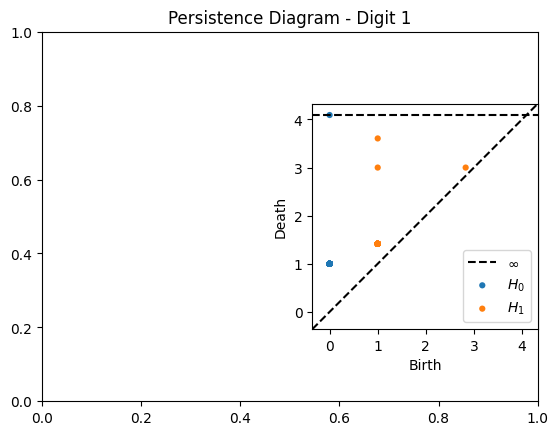

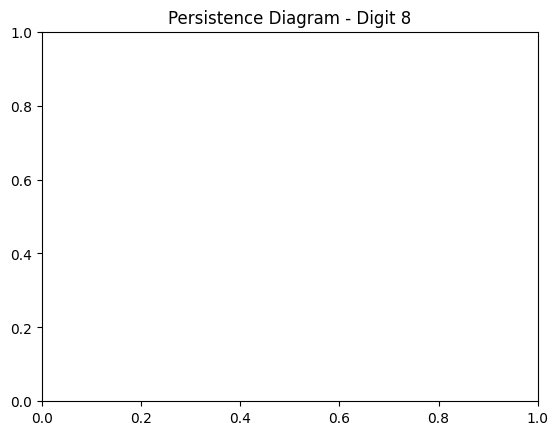

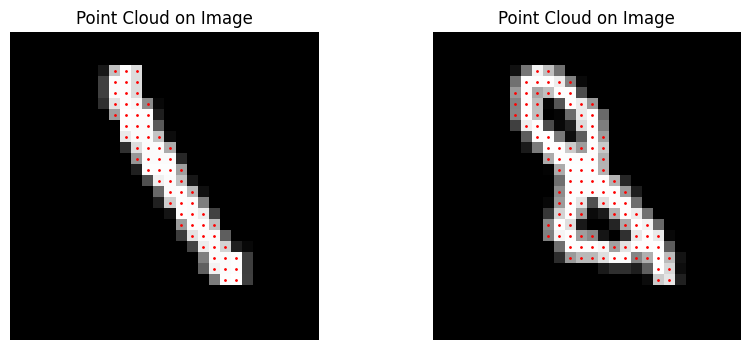

In [ ]:



import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

img1 = X_imgs[y_training == 1][0]
img8 = X_imgs[y_training == 8][0]

pc1 = image_to_pointcloud(img1)
pc8 = image_to_pointcloud(img8)

dgm1 = ripser(pc1, maxdim=1)['dgms']
dgm8 = ripser(pc8, maxdim=1)['dgms']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_diagrams(dgm1, show=True)
plt.title("Persistence Diagram - Digit 1")

plt.subplot(1, 2, 2)
plot_diagrams(dgm8, show=True)
plt.title("Persistence Diagram - Digit 8")


def show_image_with_pointcloud(img):
    plt.imshow(img, cmap='gray')
    points = image_to_pointcloud(img)
    plt.scatter(points[:, 1], points[:, 0], c='red', s=1)
    plt.title("Point Cloud on Image")
    plt.gca().invert_yaxis()
    plt.axis('off')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
show_image_with_pointcloud(img1)
plt.subplot(1, 2, 2)
show_image_with_pointcloud(img8)


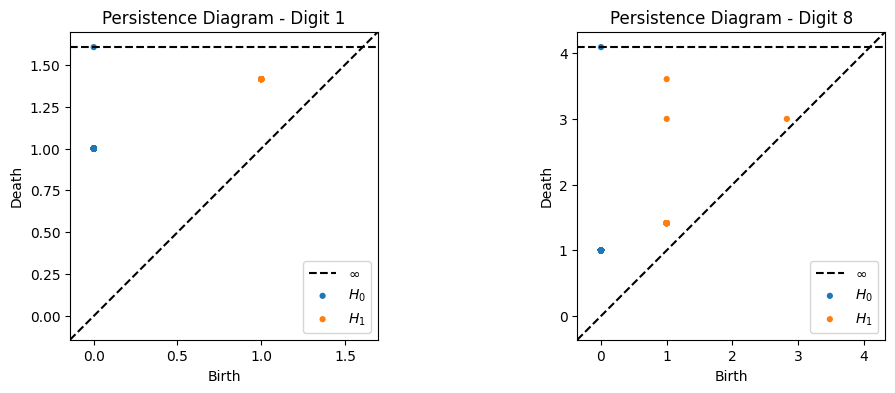

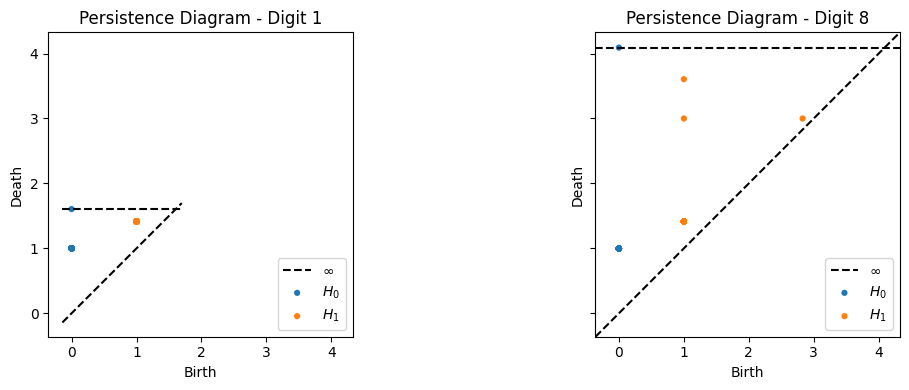

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_diagrams(dgm1, show=False)
plt.title("Persistence Diagram - Digit 1")

plt.subplot(1, 2, 2)
plot_diagrams(dgm8, show=False)
plt.title("Persistence Diagram - Digit 8")

plt.show()

# Here is a comparison of their diagram
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

plot_diagrams(dgm1, ax=axes[0], show=False)
axes[0].set_title("Persistence Diagram - Digit 1")

plot_diagrams(dgm8, ax=axes[1], show=False)
axes[1].set_title("Persistence Diagram - Digit 8")

plt.tight_layout()
plt.show()


## Summary of Experiments

- Dataset: MNIST (Filtered to digits 1 and 8(we can change it easily to others))
- TDA used to extract features from 2D images (point cloud of pixel intensities)
- Logistic Regression classifier
- Feature Evolution:
  - Started with `[num_loops, longest_loop]`
  - Gradually added `[second_longest, death_time, birth_time]`
- Final TDA-based model:
  - Accuracy on test split: 99.17%
  - Accuracy on unseen data: 99.5%
- Raw pixel baseline:
  - Accuracy on unseen data: 97.55%
  - About number of steps:
    - Number of steps increased as features did
    - the number of steps on less features is better than raw data, however the more detailed one is worse(just a little bit)
- Conclusion: TDA captures geometric structure useful for distinguishing 1 vs 8, even outperforming raw pixel classification.
